# History

In [1]:
import os
from glob import glob
from datetime import datetime

import numpy as np

import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets 

import matplotlib.pyplot as plt

%matplotlib inline

## Hyperparameter Tunning

In [2]:
num_epochs = 50
batch_size = 32

learning_rate = 0.001

dropout_rate = 0.5

input_shape = (32, 32, 3)
num_classes = 10

## Build Model

In [3]:
inputs = layers.Input(input_shape)

net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [4]:
# Model is the full model w/o custom layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),  # Optimization
              loss='sparse_categorical_crossentropy',  # Loss Function 
              metrics=['accuracy'])  # Metrics / Accuracy

# Data Preprocess

In [5]:
train_paths = glob('../dataset/cifar/train/*.png')[:1000]
test_paths = glob('../dataset/cifar/test/*.png')[:1000]

In [6]:
def get_class_name(path):
    return path.split('_')[-1].replace('.png', '')

In [7]:
train_labels = [get_class_name(path) for path in train_paths]
class_names = np.unique(train_labels)

In [8]:
def get_label(path):
    fname = tf.strings.split(path, '_')[-1]
    lbl_name = tf.strings.regex_replace(fname, '.png', '')
    onehot = tf.cast(lbl_name == class_names, tf.uint8)
    return tf.argmax(onehot)  # 이번에는 onehot이 아닌 label 번호로

In [9]:
def load_image_label(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    image = tf.cast(image, tf.float32) / 255.  # rescale
    
    label = get_label(path)
    return image, label

In [10]:
def image_preprocess(image, label):
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_flip_left_right(image)
    return image, label

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_paths)
train_dataset = train_dataset.map(load_image_label, num_parallel_calls=AUTOTUNE)
train_dataset = train_dataset.map(image_preprocess, num_parallel_calls=AUTOTUNE)
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.shuffle(buffer_size=len(train_paths))
train_dataset = train_dataset.repeat()

In [13]:
test_dataset = tf.data.Dataset.from_tensor_slices(test_paths)
test_dataset = test_dataset.map(load_image_label, num_parallel_calls=AUTOTUNE)
test_dataset = test_dataset.batch(batch_size)
test_dataset = test_dataset.repeat()

## Training

http://localhost:6006

In [14]:
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(test_paths) // batch_size

history = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_dataset,
    validation_steps=validation_steps,
    epochs=num_epochs
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
31/31 [==============================] - 8s 273ms/step - loss: 2.3022 - accuracy: 0.1157 - val_loss: 2.2690 - val_accuracy: 0.1290
Epoch 2/50
31/31 [==============================] - 8s 251ms/step - loss: 2.2415 - accuracy: 0.1632 - val_loss: 2.2504 - val_accuracy: 0.1694
Epoch 3/50
31/31 [==============================] - 8s 259ms/step - loss: 2.1562 - accuracy: 0.2097 - val_loss: 2.0685 - val_accuracy: 0.2238
Epoch 4/50
31/31 [==============================] - 8s 257ms/step - loss: 2.0950 - accuracy: 0.2252 - val_loss: 2.0661 - val_accuracy: 0.2540
Epoch 5/50
31/31 [==============================] - 8s 255ms/step - loss: 1.9972 - accuracy: 0.2231 - val_loss: 2.0008 - val_accuracy: 0.2530
Epoch 6/50
31/31 [==============================] - 8s 256ms/step - loss: 1.9788 - accuracy: 0.2355 - val_loss: 1.9342 - val_accuracy: 0.2843
Epoch 7/50
31/31 [==============================] - 8s 260ms/step - loss

# History 들여다 보기 

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [16]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 31}

In [19]:
history.model

In [21]:
new_model = history.model

In [22]:
history.history['accuracy']

[0.11570248007774353,
 0.16322314739227295,
 0.2097107470035553,
 0.22520661354064941,
 0.22314049303531647,
 0.23553718626499176,
 0.2782258093357086,
 0.3082627058029175,
 0.31198346614837646,
 0.3543388545513153,
 0.35227271914482117,
 0.35483869910240173,
 0.3181818127632141,
 0.375,
 0.40625,
 0.409957617521286,
 0.4082661271095276,
 0.44214877486228943,
 0.44279661774635315,
 0.45766130089759827,
 0.4442148804664612,
 0.44628098607063293,
 0.47417354583740234,
 0.47457626461982727,
 0.46900826692581177,
 0.4969758093357086,
 0.5268595218658447,
 0.5154958963394165,
 0.5206611752510071,
 0.5103305578231812,
 0.5144628286361694,
 0.5557851195335388,
 0.5444214940071106,
 0.5702479481697083,
 0.586776852607727,
 0.5878099203109741,
 0.5909090638160706,
 0.6064049601554871,
 0.6146694421768188,
 0.6074380278587341,
 0.6260330677032471,
 0.6177685856819153,
 0.64462810754776,
 0.6330645084381104,
 0.6508264541625977,
 0.6332644820213318,
 0.6451271176338196,
 0.6743951439857483,
 0.67

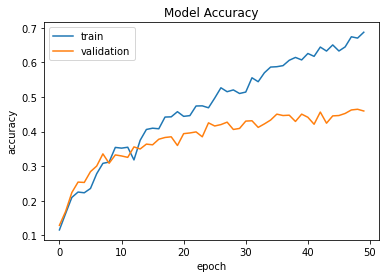

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'])
plt.show()

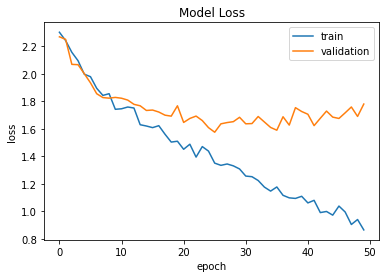

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'])
plt.show()